In [177]:
import pickle
import requests
from bs4 import BeautifulSoup
import sys
import time
import os
from IPython.display import clear_output
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

In [108]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30 


In [13]:
""" in the cell I scraped the main pages for samsung phone to get
the list of the phones and the link associated to thim 
"""
# page_links = []
# page = []
# for i in range (14):
#     source_code = requests.get("https://www.gsmarena.com/samsung-phones-f-9-0-p"+str(i)+".php")
#     soup = BeautifulSoup(source_code.text, 'html5lib')
#     page_links.append( soup.find_all("li"))
#     page.append(soup)

In [7]:
"""pickled the scrapped data
"""


# sys.setrecursionlimit(5000)
# with open ("scrapped_data.pickle",mode = "wb") as scraped_data:  
#     pickle.dump(page,scraped_data)
# sys.setrecursionlimit(1000)

''

In [5]:
""" Just in case if you want to reload the data"""
# with open("scrapped data",'rb') as read_file:
#     pages = pickle.load(read_file)

In [13]:
"""process the scraped data to scrape the full phones list"""
links = {}
link_initial = "https://www.gsmarena.com/"
for j , page in enumerate(pages):
    for i,line in enumerate(pages[j][14:99]):

        
        links[ line.text] = link_initial+str(line)[str(line).find("href=")+6:str(line).find("href=")+6+str(line)[str(line).find("href=")+6:].find('"')]

In [15]:
# phones = {}
# counter =0

# for phone , link in links.items():
#     print(counter/len(links))
#     phones[phone] = pd.read_html(link)
#     couter +=1
#     clear_otput()
    

In [17]:
"""just to check the count of tables in each page and thier shapes"""
# for phone, info in phones.items():
#     print(phone , links[phone] , end = "\n")
#     for table in info:
#         print(table.shape ,end  = "\t")
#     print ("\n")

'just to check the count of tables in each page and thier shapes'

In [18]:
"""After missing with the orignial data I made this back up
It will slow down the kernal but in term of trying multiple actions
with high chance of making error it's good to keep it stored here"""
# back_up = phones.copy()

In [322]:
#to reset to back up
#phones = back_up.copy()

In [ ]:
phones[phone][table number][0].unique()[0]  #table name Iterated to get all table names
                                            # and then drop the col

In [23]:
phones ['Galaxy Tab A 8.0 (2019)']   [0]                    # A table holsds the announced date and the launche date

0           1                                                  2
0   Network  Technology                                   GSM / HSPA / LTE
1   Network    2G bands                        GSM 850 / 900 / 1800 / 1900
2   Network    3G bands          HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100
3   Network    4G bands  LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...
4   Network       Speed                         HSPA, LTE Cat4 150/50 Mbps
5   Network         NaN                                                NaN
6   Network         NaN                                                NaN
7   Network         NaN                                                NaN
8   Network         NaN                                                NaN
9   Network         NaN                                                NaN
10  Network         NaN                                                NaN
11  Network         NaN                                                NaN
12  Network         NaN                                                NaN
13  Network         NaN                                                NaN
14  Network         NaN                                                NaN

In [ ]:
phones[ phone][2]                           # A table holds the announce date and the reliese date

In [ ]:
phones[phone][3]                            # A table holds the disply spects

In [ ]:
phones[ phone][4]                           #A table holds the platform spects

In [243]:
phone_tables["Galaxy S5 Active"]['Network']

0   Network Technology                                   GSM / HSPA / LTE
1   Network   2G bands         GSM 850 / 900 / 1800 / 1900 - all versions
2   Network   3G bands               HSDPA 850 / 1900 / 2100 - AT&T, Bell
3   Network   4G bands  LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...
4   Network        NaN  LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...
5   Network      Speed          HSPA 42.2/11.5 Mbps, LTE Cat4 150/50 Mbps
6   Network        NaN                                                NaN
7   Network        NaN                                                NaN
8   Network        NaN                                                NaN
9   Network        NaN                                                NaN
10  Network        NaN                                                NaN
11  Network        NaN                                                NaN
12  Network        NaN                                                NaN
13  Network        NaN                                                NaN
14  Network        NaN                                                NaN

In [43]:
phone_tables = {}
for phone, tabels in phones.items():
    for table in tabels:
        table_name = table.iloc[:,0].unique()[0]
        table.columns = table.iloc[0]
        #table = table[1:]
        if not phone in phone_tables.keys():
            phone_tables[phone] = {}
        phone_tables[phone][table_name] = table
        if table_name in table.columns:
            table.drop(columns = table_name, inplace = True)
        table.dropna(how = "all", inplace = True)

In [25]:
phone_tables_BU = phone_tables.copy()

In [36]:
phone_tables = phone_tables_BU.copy()


In [37]:
phone_tables

{'Galaxy Tab A 8.0 (2019)': {'Network':           0           1                                                  2
  0   Network  Technology                                   GSM / HSPA / LTE
  1   Network    2G bands                        GSM 850 / 900 / 1800 / 1900
  2   Network    3G bands          HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100
  3   Network    4G bands  LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...
  4   Network       Speed                         HSPA, LTE Cat4 150/50 Mbps
  5   Network         NaN                                                NaN
  6   Network         NaN                                                NaN
  7   Network         NaN                                                NaN
  8   Network         NaN                                                NaN
  9   Network         NaN                                                NaN
  10  Network         NaN                                                NaN
  11  Network         NaN             

In [44]:
i = 0
for phone, tables in phone_tables.items():
    for table_name , table in tables.items():
        if table_name in table.columns:
            table.drop(columns = table_name, inplace = True)
        table.dropna(how = "all", inplace = True)
        i+=1
        print (i)
        clear_output()
        

13533

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
# tables_with_na = []
# phones_with_na = []
# for phone, tables in phone_tables.items():
#     for table_naem, table in tables.items():
#         if(table[pd.isna(table[table.columns[0]])]).shape[0]:
#             #print(phone, table_name)
#             tables_with_na.append(table_name)
#             phones_with_na.append(phone)
# print(set(tables_with_na))
# print(set(phones_with_na))

In [39]:

# phone_tables['Galaxy C7 Pro']

In [45]:

phone_tables['P6810 Galaxy Tab 7.7']['Body']

0  Dimensions  196.7 x 133 x 7.9 mm (7.74 x 5.24 x 0.31 in)
0  Dimensions  196.7 x 133 x 7.9 mm (7.74 x 5.24 x 0.31 in)
1      Weight                              340 g (11.99 oz)
2         SIM                                            No

In [42]:
# phone_tables['Galaxy C7 Pro']['Display']

In [357]:
# for row in phone_tables['Galaxy C7 Pro']['Display'].iterrows():
    print(row[1][0],row[1][1])

Type Super AMOLED capacitive touchscreen, 16M colors
Size 5.7 inches, 89.6 cm2 (~74.1% screen-to-body ratio)
Resolution 1080 x 1920 pixels, 16:9 ratio (~386 ppi density)
Protection Corning Gorilla Glass 4


In [46]:
final_df = pd.DataFrame(index =phone_tables.keys())


In [47]:
for phone, tables in phone_tables.items():
    for table_name , table in tables.items():
        for row in table.iterrows():
            final_df.loc[phone,row[1][0]] = row[1][1] 
            

In [236]:
wordcloud = WordCloud( colormap="tab10",width=2000, height=1125,max_font_size=800,prefer_horizontal=.5,max_words=100, background_color="white").generate(", ".join([str(i) for i in columns.index]))

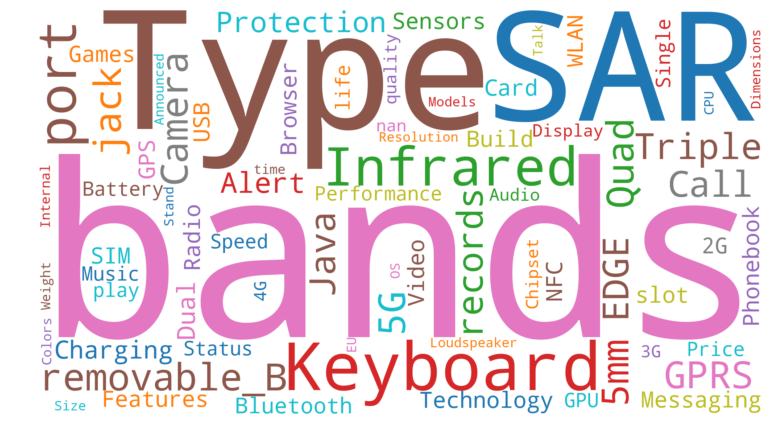

In [237]:
plt.figure(figsize=(10.6875,19))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.title("Columns on The Data Set",fontdict={'fontsize': 50},color="b",weight = 999,family = 'serif')
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("Column_Names.eps")

In [50]:
final_df[final_df['5G'].notnull()][["Price","5G"]]

Price                             5G
Galaxy S10 5G  About 1160 EUR    5G NSA / Sub6 / mmWave; N78
Galaxy Fold    About 1750 EUR  5G NSA / Sub6 - only 5G model

In [223]:
value_count = pd.DataFrame(final_df.nunique().sort_values()).rename(columns ={0:"A"})


In [225]:
#plt.figure(figsize=(18,10))
columns = value_count.join(pd.DataFrame(final_df.isnull().mean(axis=0).sort_values(ascending = False)).rename(columns ={0:"B"}))
# plt.savefig("missing values2.eps",dpi = 1000)


In [147]:
final_df.drop(columns=[0.0,"Clock","Alarm"],inplace=True)

In [148]:
final_df.to_csv("Data_file")

In [156]:
for col in final_df.columns:
    print (col, list(final_df[col].unique()))
    print ("\n"*2)

Technology ['GSM / HSPA / LTE', 'HSPA / LTE', 'GSM / CDMA / HSPA / EVDO / LTE / 5G', 'GSM / CDMA / HSPA / EVDO / LTE', 'GSM / HSPA / LTE / 5G', 'No cellular connectivity', 'GSM / CDMA / HSPA / LTE', 'GSM / HSPA', 'CDMA / HSPA / EVDO / LTE', 'GSM / UMTS / HSPA / LTE', 'GSM', 'CDMA / EVDO', 'CDMA / EVDO / LTE', 'CDMA', 'CDMA / CDMA2000', 'GSM / CDMA / EVDO', 'HSPA', 'GSM / CDMA', 'GSM / UMTS', 'CDMA / HSPA / EVDO', 'GSM / CDMA / UMTS / EVDO']



2G bands ['GSM 850 / 900 / 1800 / 1900', 'GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (Dual SIM model only)', 'GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2', nan, 'GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM model only)', 'GSM 900 / 1800 - SIM 1 & SIM 2 (Dual SIM model only)', 'GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM only)', 'GSM 900 / 1800 / 1900', 'GSM 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM model only)', 'GSM 900 / 1800 / 1900 - SIM 1 & SIM 2', 'GSM 900 / 1800', 'GSM 900 / 1800 - SIM 1 & SIM 2', 'GSM 850 / 900 / 1800

In [243]:
#drop rwos with nan in Announced date
final_df[final_df["Status"].str.extract(r'([0-9]{4})', expand=False).isna()][ "Status"].unique()

array(['Discontinued', 'Cancelled'], dtype=object)

In [190]:
#np.nan column has the featuers of batteries

final_df ["removable_B"]=final_df.loc[:,np.nan].str.split(n=1).str[0]


In [192]:
final_df[np.nan]

Galaxy Tab A 8.0 (2019)             Non-removable Li-Po 5100 mAh battery
Galaxy Xcover 4s                       Removable Li-Ion 2800 mAh battery
Galaxy M40                          Non-removable Li-Po 3500 mAh battery
Galaxy View2                       Non-removable Li-Po 12000 mAh battery
Galaxy S10 5G                      Non-removable Li-Ion 4500 mAh battery
Galaxy S10+                        Non-removable Li-Ion 4100 mAh battery
Galaxy S10                         Non-removable Li-Ion 3400 mAh battery
Galaxy S10e                        Non-removable Li-Ion 3100 mAh battery
Galaxy Fold                         Non-removable Li-Po 4380 mAh battery
Galaxy Watch Active                 Non-removable Li-Ion 230 mAh battery
Galaxy A2 Core                         Removable Li-Ion 2600 mAh battery
Galaxy M30                          Non-removable Li-Po 5000 mAh battery
Galaxy M20                          Non-removable Li-Po 5000 mAh battery
Galaxy M10                         Non-removable Li

In [256]:
for col in final_df.columns:
    #with open ("columns_data","w") as f:
    print(", ".join(list(final_df[col].unique())))

GSM / HSPA / LTE, HSPA / LTE, GSM / CDMA / HSPA / EVDO / LTE / 5G, GSM / CDMA / HSPA / EVDO / LTE, GSM / HSPA / LTE / 5G, No cellular connectivity, GSM / CDMA / HSPA / LTE, GSM / HSPA, CDMA / HSPA / EVDO / LTE, GSM / UMTS / HSPA / LTE, GSM, CDMA / EVDO, CDMA / EVDO / LTE, CDMA, CDMA / CDMA2000, GSM / CDMA / EVDO, HSPA, GSM / CDMA, GSM / UMTS, CDMA / HSPA / EVDO, GSM / CDMA / UMTS / EVDO


TypeError: sequence item 3: expected str instance, float found

In [247]:
["A"]+["B"]

['A', 'B']

In [356]:
i = 55


print (final_df.columns[i],len(final_df[final_df.columns[i]].unique()))
print(final_df[final_df.columns[i]].unique())

Phonebook 44
[nan 'Yes' '1000 entries' '1500 entries' '1000 entries, Photocall'
 'Yes, Photocall' '1000 contacts, Photocall' '500 or 1000 entries'
 'Yes, up to 1000 entries' 'Yes, up to 500 entries'
 '2000 entries, Photocall' '2000 contacts, Photocall' '2000 entries'
 '200 entries' '3000 entries, Photocall' '500 entries'
 '600 entries, Photocall' 'Yes, up to 200 entries'
 '1000 contacts, Photo call' '300 contacts, Photo call' 'Yes, Photo call'
 'Yes, Photo Contact' '500 entries, Photocall' '250 entries'
 '2000 contacts, Photo Contact' '2000 contacts, Photo call, Photo Contact'
 '1000 entries, Photo call' 'Yes, up to 1000 entries, Photocall'
 '300 entries, Photocall' '100 entries' 'Yes, 1000 entries' '300 entries'
 '1000 x 12 fields, Photo call' '1000 entires'
 '1000 x 10 fields, Photo call' '500 x 10 fields, Photo call'
 '1000 x 6 fields, Photo call' '500 entries, Photo call'
 '1000 x 15 fields' '1000 fields, Photo call' 'Yes, Photo/Video call'
 '1000 entries x 4 fields' '2000 entries,

In [358]:
final_df.drop(columns=['Loudspeaker' ,'Radio' ,'Colors' ,
                       'Models' ,'Battery life' ,'Stand-by' ,
                       'Talk time' ,'Music play' ,'Phonebook' ,
                       'Call records' ,'Messaging' ,'Games' ,
                       'Java' ,'Keyboard' ,'Browser' ,'Alert types' ], inplace=True)

In [360]:
final_df.Technology.str.split("/")

Galaxy Tab A 8.0 (2019)                                  [GSM ,  HSPA ,  LTE]
Galaxy Xcover 4s                                         [GSM ,  HSPA ,  LTE]
Galaxy M40                                               [GSM ,  HSPA ,  LTE]
Galaxy View2                                                    [HSPA ,  LTE]
Galaxy S10 5G                      [GSM ,  CDMA ,  HSPA ,  EVDO ,  LTE ,  5G]
Galaxy S10+                              [GSM ,  CDMA ,  HSPA ,  EVDO ,  LTE]
Galaxy S10                               [GSM ,  CDMA ,  HSPA ,  EVDO ,  LTE]
Galaxy S10e                              [GSM ,  CDMA ,  HSPA ,  EVDO ,  LTE]
Galaxy Fold                                        [GSM ,  HSPA ,  LTE ,  5G]
Galaxy Watch Active                                [No cellular connectivity]
Galaxy A2 Core                                           [GSM ,  HSPA ,  LTE]
Galaxy M30                                               [GSM ,  HSPA ,  LTE]
Galaxy M20                                               [GSM , 

In [402]:
def add_colmouns_from_Technolgy_lists(row):
    global final_df
    featuers = row["Technology"].split("/")
    for featuer in featuers:
        featuer= featuer.lower().strip()
        if featuer not in final_df.columns:
            final_df["tech_"+featuer] = 0
        #row[featuer] = 1
        

In [367]:
#final_df.to_csv("data_file.csv")

In [401]:
final_df= pd.read_csv("data_file.csv")

In [403]:
final_df.apply(add_colmouns_from_Technolgy_lists,broadcast=True,axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The broadcast argument is deprecated and will be removed in a future version. You can specify result_type='broadcast' to broadcast the result to the original dimensions
  """Entry point for launching an IPython kernel.


Unnamed: 0 Technology 2G bands 3G bands 4G bands Speed Announced Status  \
0          None       None     None     None     None  None      None   None   
1          None       None     None     None     None  None      None   None   
2          None       None     None     None     None  None      None   None   
3          None       None     None     None     None  None      None   None   
4          None       None     None     None     None  None      None   None   
5          None       None     None     None     None  None      None   None   
6          None       None     None     None     None  None      None   None   
7          None       None     None     None     None  None      None   None   
8          None       None     None     None     None  None      None   None   
9          None       None     None     None     None  None      None   None   
10         None       None     None     None     None  None      None   None   
11         None       None     None     None     None  None      None   None   
12         None       None     None     None     None  None      None   None   
13         None       None     None     None     None  None      None   None   
14         None       None     None     None     None  None      None   None   
15         None       None     None     None     None  None      None   None   
16         None       None     None     None     None  None      None   None   
17         None       None     None     None     None  None      None   None   
18         None       None     None     None     None  None      None   None   
19         None       None     None     None     None  None      None   None   
20         None       None     None     None     None  None      None   None   
21         None       None     None     None     None  None      None   None   
22         None       None     None     None     None  None      None   None   
23         None       None     None     None     None  None      None   None   
24         None       None     None     None     None  None      None   None   
25         None       None     None     None     None  None      None   None   
26         None       None     None     None     None  None      None   None   
27         None       None     None     None     None  None      None   None   
28         None       None     None     None     None  None      None   None   
29         None       None     None     None     None  None      None   None   
...         ...        ...      ...      ...      ...   ...       ...    ...   
1071       None       None     None     None     None  None      None   None   
1072       None       None     None     None     None  None      None   None   
1073       None       None     None     None     None  None      None   None   
1074       None       None     None     None     None  None      None   None   
1075       None       None     None     None     None  None      None   None   
1076       None       None     None     None     None  None      None   None   
1077       None       None     None     None     None  None      None   None   
1078       None       None     None     None     None  None      None   None   
1079       None       None     None     None     None  None      None   None   
1080       None       None     None     None     None  None      None   None   
1081       None       None     None     None     None  None      None   None   
1082       None       None     None     None     None  None      None   None   
1083       None       None     None     None     None  None      None   None   
1084       None       None     None     None     None  None      None   None   
1085       None       None     None     None     None  None      None   None   
1086       None       None     None     None     None  None      None   None   
1087       None       None     None     None     None  None      None   None   
1088       None       None     None     None     None  None      None   None   
1089 

In [428]:
for index,row in final_df.iterrows():
    #if isinstance(row["Technology"],str):
    #print(row["Technology"])
    featuers = row["Technology"].split("/")
    for featuer in featuers:
        featuer= featuer.lower().strip()
        #if featuer not in final_df.columns:
            #final_df["tech_"+featuer] = 0
        final_df.loc[index,"tech_"+featuer] = 1
    

In [430]:
final_df.columns

Index(['Unnamed: 0', 'Technology', '2G bands', '3G bands', '4G bands', 'Speed',
       'Announced', 'Status', 'Dimensions', 'Weight', 'Build', 'SIM', 'Type',
       'Size', 'Resolution', 'OS', 'Chipset', 'CPU', 'GPU', 'Card slot',
       'Internal', 'Single', 'Video', '3.5mm jack', 'WLAN', 'Bluetooth', 'GPS',
       'USB', 'Sensors', 'Unnamed: 29', 'SAR EU', 'Price', 'Features', 'NFC',
       'Protection', 'Triple', 'Charging', 'SAR', '5G', 'Quad', 'Dual',
       'Performance', 'Display', 'Camera', 'Audio quality', 'GPRS', 'EDGE',
       'Infrared port', 'removable_B', 'tech_gsm', 'tech_hspa', 'tech_lte',
       'tech_cdma', 'tech_evdo', 'tech_5g', 'tech_no cellular connectivity',
       'tech_umts', 'tech_cdma2000'],
      dtype='object')

In [434]:
final_df.drop(inplace=True,index=final_df[final_df['tech_no cellular connectivity']>0].index)

In [597]:
final_df.to_csv("data_file_1.1.csv")

In [437]:
final_df.index = final_df['Unnamed: 0']
final_df.drop(columns='Unnamed: 0',inplace=True)

In [441]:
final_df.drop(columns="Technology",inplace=True)

In [470]:
"""remove phones with no 3g bands"""
final_df.drop(index = final_df[final_df["3G bands"].isna()].index, inplace=True)

In [478]:
[col for col in final_df.columns if col[:4] == "tech"]

['tech_gsm',
 'tech_hspa',
 'tech_lte',
 'tech_cdma',
 'tech_evdo',
 'tech_5g',
 'tech_no cellular connectivity',
 'tech_umts',
 'tech_cdma2000']

In [483]:
final_df.drop(columns=['2G bands','3G bands','4G bands'],inplace = True)

In [595]:
speed_df  = (final_df["Speed"].str
 .extractall(pat = r"(\b[0-9\.]*)/(\b[0-9\.]*)\s(Mbps)")
 .iloc[0 :100].reset_index()
 .rename({"Unnamed: 0":"phone",0:"high_speed",1:"low_speed",2:"unit"},axis =1)
 .pivot(index='phone', columns='match', values=['high_speed',"low_speed"])
 

)
speed_df.columns = speed_df.columns.map(lambda x: '|'.join([str(i) for i in x]))
final_df = final_df.join(speed_df,)
final_df.drop(columns="Speed",inplace= True)

In [515]:
"""drop all columns with null in price"""
#final_df.drop(index=final_df[final_df['Price'].isna()].index,inplace= True)

In [526]:
final_df["screen_size"] = final_df["Size"].str.extract(pat= r"(\b[0-9\.]{1,}\s)")

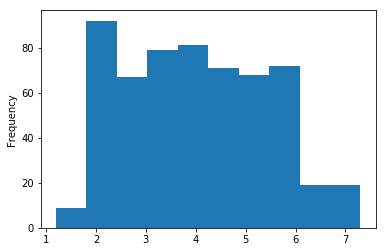

In [536]:
final_df.screen_size = pd.to_numeric(final_df.screen_size, errors='coerce')
final_df.screen_size.plot(kind= "hist");

In [535]:
final_df.drop(index=final_df[final_df.screen_size>7.3].index,inplace=True)

In [545]:
final_df["paresed_price"] = pd.to_numeric(final_df.Price.str.extract(pat = r"\s([0-9/.]{1,})\s")[0])

In [549]:
#final_df["paresed_price"]

In [600]:
#final_df

In [604]:
final_df[final_df["OS"].isna()].shape[0]/final_df.shape[0]

0.23842195540308747

In [607]:
#since I have 23% of the rows with nulls in OS I'll not consider that column
final_df.drop(columns="OS",inplace=True)

In [630]:
final_df["announced_year"] = final_df["Announced"].str.extract(pat=r"([0-9]{4})").astype(int)[0]
final_df["announcement_month"] = final_df["Announced"].str.extract(pat= r",\s([A-Za-z0-9]{2,})")[0]

In [633]:
final_df.drop(columns= "Announced",inplace=True)

In [646]:
final_df["dual_sim"]= np.where(final_df["SIM"].str.extract(pat="(Dual)")[0]=='Dual',1,0)

In [ ]:
final_df["esim"] = np.where(final_df["SIM"].str.extract(pat="([eE]SIM)")[0]=="eSIM",1,0)

In [656]:
final_df.drop(columns= "SIM",inplace=True)

In [658]:
final_df.drop(columns= "Status",inplace=True)

In [663]:
# I decide to delete the 'Galaxy Fold' cause it's has so many features the not consistent with the other phones
final_df.drop(index= 'Galaxy Fold',inplace= True)

In [669]:
final_df["length_mm"] = final_df.Dimensions.str.extract(pat=r"([0-9\.]{1,})\sx\s([0-9\.]{1,})\sx\s([0-9\.]{1,}).* mm")[0].astype(float)
final_df["width_mm"] = final_df.Dimensions.str.extract(pat=r"([0-9\.]{1,})\sx\s([0-9\.]{1,})\sx\s([0-9\.]{1,}).* mm")[1].astype(float)
final_df["depth_mm"] = final_df.Dimensions.str.extract(pat=r"([0-9\.]{1,})\sx\s([0-9\.]{1,})\sx\s([0-9\.]{1,}).* mm")[2].astype(float)

In [743]:
final_df["length_mm"]= final_df["length_mm"].astype(float)
final_df["width_mm"] = final_df["width_mm"].astype(float)
final_df["depth_mm"]=final_df["depth_mm"].astype(float)
final_df['high_speed|0']=final_df['high_speed|0'].astype(float)
final_df['high_speed|1']=final_df['high_speed|1'].astype(float)
final_df['low_speed|1']=final_df['low_speed|1'].astype(float)
final_df['low_speed|0']=final_df['low_speed|0'].astype(float)

In [670]:
final_df.drop(columns= "Dimensions",inplace=True)

In [675]:
final_df["weight_oz"]= final_df.Weight.str.extract(pat ="([0-9\.]{1,})\soz").astype(float)

In [676]:
final_df.drop(columns= "Weight",inplace=True)

In [678]:
final_df.drop(columns= "Build",inplace=True)

In [1041]:
[x for x in final_df.columns if x[0]==x[0].upper()]

['Internal', 'SAR_EU_head']

In [1036]:
final_df["SAR_EU_head"] = final_df["SAR EU"].str.extract(r"([0-9\.]{1,})\s").astype(float)
final_df["SAR_EU_head"].fillna((final_df['SAR_EU_head'].mean()), inplace=True)
final_df.drop(columns=["SAR EU","SAR"],inplace=True)

In [1038]:
final_df.drop(columns=['Sensors',"Camera"],inplace=True)

In [1022]:
final_df['Single'].unique()

final_df["first_cam"] = np.where(final_df['Single']==final_df['Single'],1,0)
final_df.drop(columns=['Single'],inplace=True)

In [1014]:
final_df['Triple']
final_df["triple_cam"] = np.where(final_df['Triple']==final_df['Triple'],1,0)
final_df.drop(columns=['Triple'],inplace=True)

In [ ]:

final_df["quad_cam"] = np.where(final_df['Quad']==final_df['Quad'],1,0)
final_df.drop(columns=['Quad'],inplace=True)

In [1006]:
#final_df[final_df['Performance'].isna()]#429values are missing

In [ ]:
final_df.drop(columns = ['Sensors','Features','EDGE','GPRS','Performance',"Protection"],inplace=True)

In [994]:
final_df["fast_chaging_power"] = final_df.Charging.str.extract(r"([0-9]*)[Ww]")[0]
final_df.drop(columns=["Charging"],inplace=True)

In [988]:
final_df.drop(columns = ["Display",'GPS'], inplace=True)

In [983]:
final_df["duel_cam"] = np.where(final_df['Dual']==final_df['Dual'],1,0)
final_df.drop(columns=['Dual'],inplace=True)

In [980]:
final_df["bluetooth_m"] = (
np.where(
    final_df["Bluetooth"].str.extract(r"([0-5])\.")[0]==
        final_df["Bluetooth"].str.extract(r"([0-5])\.")[0],
        final_df["Bluetooth"].str.extract(r"([0-5])\.")[0],0
)).astype("int")
final_df.drop(columns=["Bluetooth"],inplace=True)

In [969]:
final_df["wlan"] = (np.where(
    final_df["WLAN"].str.extract(r"/(ax)")=="ax","ax",
    np.where(
        final_df["WLAN"].str.extract(r"/(ac)")=="ac","ac",
        np.where(
            final_df["WLAN"].str.extract(r"/(n)")=="n","n",
            np.where(
                final_df["WLAN"].str.extract(r"/(g)")=="g","g",
                np.where(
                    final_df["WLAN"].str.extract(r"/(b)")=="b","b",
                    np.where(
                        final_df["WLAN"].str.extract(r"/(a)")=="a","a","NO"


    
    
)))))))
final_df.drop(columns="WLAN",inplace=True)

In [996]:
final_df["battery_size"] = final_df['Unnamed: 29'].str.extract(r"([0-9]+)\sm")[0]

final_df.drop(columns = ['Unnamed: 29'],inplace=True)

In [ ]:
final_df.drop(columns = ["Price","Video"],inplace=True)

In [931]:
final_df["card_slot"] = np.where (final_df['Card slot']=="No",0,1)
final_df.drop(columns='Card slot',inplace=True)

In [922]:
final_df["gpu_manufacturer"] = (np.where(
        final_df['GPU'].str.extract(r"([A-Za-z]{1,})")[0]==
        final_df['GPU'].str.extract(r"([A-Za-z]{1,})")[0],
        final_df['GPU'].str.extract(r"([A-Za-z]{1,})")[0],        
        "NO")
)
final_df.drop(columns="GPU",inplace=True)

In [900]:
final_df.drop(columns=['USB','NFC',  '3.5mm jack','5G','Audio quality','Infrared port'],inplace= True)

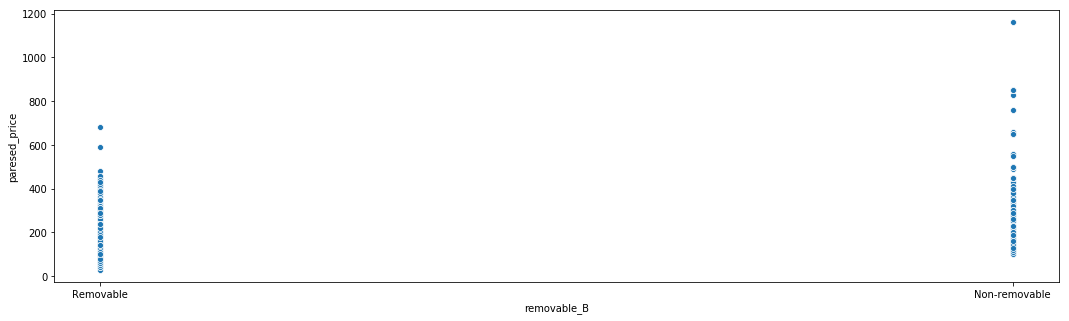

In [1179]:
import seaborn as sns
plt.figure(figsize=(18,5))
sns.scatterplot(y= "paresed_price", data= final_df,x= 'removable_B');

In [696]:
final_df.drop(index=final_df[final_df['weight_oz']>9].index,inplace=True)

In [720]:
final_df.drop(inplace = True,index = [x for x in final_df.index if x.lower().find("gear")>=0 or x.lower().find("watch")>=0])

In [771]:
final_df["screen ratio"]= final_df["Size"].str.extract(pat= r"([0-9\.]{1,})%")[0].astype(float)/100

In [772]:
final_df.drop(columns="Size",inplace =True)

In [ ]:
final_df.drop(index = "Serenata",inplace=True) # it's not a cell-phone

In [750]:
final_df.drop(columns=['high_speed|0','low_speed|0', 'low_speed|1'],inplace=True)

In [754]:
final_df.drop(columns="esim",inplace=True)

In [780]:
final_df["touchscreen"] = np.where(final_df["Type"].str.extract(pat = "(touchscreen)")[0]=="touchscreen",1,0)


In [782]:
final_df.drop(columns="Type", inplace =True)

In [791]:
final_df["pixels_d1"] = final_df["Resolution"].str.extract(pat= r"([0-9]+)\sx\s([0-9]+)")[0].astype(float)
final_df["pixels_d2"] = final_df["Resolution"].str.extract(pat= r"([0-9]+)\sx\s([0-9]+)")[1].astype(float)

In [792]:
final_df["total_pixels"] = final_df["pixels_d1"]*final_df["pixels_d2"]

In [799]:
final_df.drop(columns= ['Chipset','Resolution'],inplace=True)

In [833]:
final_df["cores"] = ( np.where(
    final_df["CPU"].str.lower().str.extract(r"([A-Za-z]{1,})-core")[0]==
    final_df["CPU"].str.lower().str.extract(r"([A-Za-z]{1,})-core")[0],
    final_df["CPU"].str.lower().str.extract(r"([A-Za-z]{1,})-core")[0],
    "single")
)

In [898]:
#final_df["CPU"].unique()

In [893]:
final_df = (final_df.join(final_df["CPU"].str.lower().str.extractall(r"([0-9])x([0-9\.]*)\s([mg]hz)")
 .reset_index().groupby("Unnamed: 0").max()[1], rsuffix = "cpu_top_speed_chip")
)

In [935]:
final_df.rename(columns={1:"cpu_top_speed_chip"},inplace=True)

In [897]:
final_df.drop(columns="CPU",inplace=True)

In [1312]:
final_df.to_csv("Cleaned_data.csv")
#final_df = pd.read_csv("Cleaned_data.csv")

In [1049]:
final_df.drop(index = final_df[final_df.screen_size!=final_df.screen_size].index,inplace = True)

In [1185]:
#Try to get ROM
test=(
pd.DataFrame(np.where(final_df.Internal.str.extract(pat = "^([0-9]+)\s([GM]B)$")==
         final_df.Internal.str.extract(pat = "^([0-9]+)\s([GM]B)$"),
         final_df.Internal.str.extract(pat = "^([0-9]+)\s([GM]B)$"),
         np.where(final_df.Internal.str.extract("([0-9]*)\s([GM]B),")==
                  final_df.Internal.str.extract("([0-9]*)\s([GM]B),"),
                  final_df.Internal.str.extract("([0-9]*)\s([GM]B),"),
                  np.where(final_df.Internal.str.extract("([0-9]*)\s([GM]B) ROM")==
                           final_df.Internal.str.extract("([0-9]*)\s([GM]B) ROM"),
                           final_df.Internal.str.extract("([0-9]*)\s([GM]B) ROM"),
                           np.where(final_df.Internal.str.extract("([0-9\.]*)\s([GM]B).*[0-9]")== 
                                   final_df.Internal.str.extract("([0-9\.]*)\s([GM]B).*[0-9]"),
                                   final_df.Internal.str.extract("([0-9\.]*)\s([GM]B).*[0-9]"),
                                    np.where(final_df.Internal.str.extract("^([0-9\.]*),")==
                                           final_df.Internal.str.extract("([0-9\.]*),"),
                                           final_df.Internal.str.extract("([0-9\.]*),"),
                                             np.where(final_df.Internal.str.extract("([0-9\.]*)\s([GM]B)")==
                                               final_df.Internal.str.extract("([0-9\.]*)\s([GM]B)"),
                                               final_df.Internal.str.extract("([0-9\.]*)\s([GM]B)"),0
         
 
 
 
))))))))
final_df["storage"] = test[0].astype(float)
final_df["storage_unit"] = test[1]

In [1187]:

# [x for x in final_df.reset_index()[test[0]==0]["Internal"].unique()]

In [1188]:
final_df.drop(columns="Internal",inplace = True)

In [1195]:
final_df.columns=[col if col != 'Unnamed: 0' else "phone" for col in final_df.columns ]

In [1200]:
final_df["fast_chaging_power"] = np.where(final_df["fast_chaging_power"]== final_df["fast_chaging_power"],True,False) 

In [ ]:
final_df.info()

In [1202]:
final_df.drop(columns=["cpu_top_speed_chip","high_speed|1"],inplace = True)

In [ ]:
final_df.info()

In [1206]:
#after checking the number of rows with na it's 42 rows I'belive they will not affect my data so much. I decided to drop them.
final_df.dropna(how="any",inplace = True)

In [1223]:
final_df['tech_gsm'].value_counts()

1    456
0     62
Name: tech_gsm, dtype: int64

In [1218]:
final_df.drop(columns= "announcement_month",inplace = True)

In [ ]:
final_df[final_df["tech_gsm"]==0 ]

In [1226]:
final_df.columns

Index(['phone', 'removable_B', 'tech_gsm', 'tech_hspa', 'tech_lte',
       'tech_cdma', 'tech_evdo', 'tech_5g', 'tech_umts', 'tech_cdma2000',
       'screen_size', 'paresed_price', 'announced_year', 'dual_sim',
       'length_mm', 'width_mm', 'depth_mm', 'weight_oz', 'screen ratio',
       'touchscreen', 'pixels_d1', 'pixels_d2', 'total_pixels', 'cores',
       'gpu_manufacturer', 'card_slot', 'battery_size', 'wlan', 'bluetooth_m',
       'duel_cam', 'fast_chaging_power', 'quad_cam', 'triple_cam', 'first_cam',
       'SAR_EU_head', 'storage', 'storage_unit'],
      dtype='object')

In [1228]:
final_df.drop(columns=["tech_gsm","tech_cdma","tech_cdma2000"],inplace=True)

In [1229]:
final_df.columns

Index(['phone', 'removable_B', 'tech_hspa', 'tech_lte', 'tech_evdo', 'tech_5g',
       'tech_umts', 'screen_size', 'paresed_price', 'announced_year',
       'dual_sim', 'length_mm', 'width_mm', 'depth_mm', 'weight_oz',
       'screen ratio', 'touchscreen', 'pixels_d1', 'pixels_d2', 'total_pixels',
       'cores', 'gpu_manufacturer', 'card_slot', 'battery_size', 'wlan',
       'bluetooth_m', 'duel_cam', 'fast_chaging_power', 'quad_cam',
       'triple_cam', 'first_cam', 'SAR_EU_head', 'storage', 'storage_unit'],
      dtype='object')

In [1233]:
final_df["network_g"]=(np.where(final_df["tech_5g"]==1,"5g",
         np.where(final_df["tech_lte"]==1,"4g",
                np.where(final_df["tech_hspa"]+final_df["tech_evdo"]+final_df["tech_umts"]==1,"3g",np.nan
))))

In [1234]:
final_df.drop(columns = ["tech_5g","tech_lte","tech_hspa","tech_evdo","tech_umts"],inplace=True)

In [1235]:
final_df.columns

Index(['phone', 'removable_B', 'screen_size', 'paresed_price',
       'announced_year', 'dual_sim', 'length_mm', 'width_mm', 'depth_mm',
       'weight_oz', 'screen ratio', 'touchscreen', 'pixels_d1', 'pixels_d2',
       'total_pixels', 'cores', 'gpu_manufacturer', 'card_slot',
       'battery_size', 'wlan', 'bluetooth_m', 'duel_cam', 'fast_chaging_power',
       'quad_cam', 'triple_cam', 'first_cam', 'SAR_EU_head', 'storage',
       'storage_unit', 'network_g'],
      dtype='object')

In [1243]:
final_df.loc[final_df["storage_unit"] == 0,["storage_unit"]]= np.nan

In [1249]:
final_df.describe(include="all" )

phone removable_B  screen_size  paresed_price  \
count               518         518   518.000000     518.000000   
unique              518           2          NaN            NaN   
top     Galaxy Pop i559   Removable          NaN            NaN   
freq                  1         423          NaN            NaN   
mean                NaN         NaN     4.035811     191.727799   
std                 NaN         NaN     1.255136     131.647635   
min                 NaN         NaN     1.600000      30.000000   
25%                 NaN         NaN     3.000000     110.000000   
50%                 NaN         NaN     4.000000     150.000000   
75%                 NaN         NaN     5.000000     240.000000   
max                 NaN         NaN     7.000000    1160.000000   

        announced_year    dual_sim   length_mm    width_mm    depth_mm  \
count       518.000000  518.000000  518.000000  518.000000  518.000000   
unique             NaN         NaN         NaN         NaN         NaN   
top                NaN         NaN         NaN         NaN         NaN   
freq               NaN         NaN         NaN         NaN         NaN   
mean       2012.457529    0.293436  127.162355   64.177606   11.009266   
std           3.164896    0.455777   18.373960    9.141840    3.048104   
min        2006.000000    0.000000   86.000000   38.000000    5.900000   
25%        2010.000000    0.000000  113.000000   57.825000    8.500000   
50%        2012.000000    0.000000  122.950000   63.800000   10.700000   
75%        2015.000000    1.000000  142.375000   71.000000   12.800000   
max        2019.000000    1.000000  191.800000   99.600000   23.000000   

         weight_oz  ...  bluetooth_m    duel_cam  fast_chaging_power  \
count   518.000000  ...   518.000000  518.000000                 518   
unique         NaN  ...          NaN         NaN                   2   
top            NaN  ...          NaN         NaN               False   
freq           NaN  ...          NaN         NaN                 456   
mean      4.690560  ...     3.113900    0.040541                 NaN   
std       0.996323  ...     1.098865    0.197414                 NaN   
min       2.500000  ...     0.000000    0.000000                 NaN   
25%       3.950000  ...     2.000000    0.000000                 NaN   
50%       4.590000  ...     3.000000    0.000000                 NaN   
75%       5.360000  ...     4.000000    0.000000                 NaN   
max       8.640000  ...     5.000000    1.000000                 NaN   

          quad_cam  triple_cam   first_cam SAR_EU_head     storage  \
count   518.000000  518.000000  518.000000  518.000000  518.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.003861    0.019305    0.992278    0.517126   68.934556   
std       0.062077    0.137728    0.087620    0.200203  108.972800   
min       0.000000    0.000000    0.000000    0.080000    0.000000   
25%       0.000000    0.000000    1.000000    0.382500    8.000000   
50%       0.000000    0.000000    1.000000    0.521838   18.000000   
75%       0.000000    0.000000    1.000000    0.590000   80.000000   
max       1.000000    1.000000    1.000000    1.390000  952.000000   

        storage_unit network_g  
count            493       518  
unique             3         4  
top               GB        3g  
freq             341       289  
mean             NaN       NaN  
std              NaN       NaN  
min              NaN       NaN  
25%              NaN       NaN  
50%              NaN       NaN  
75%              NaN       NaN  
max              NaN       NaN  

[11 rows x 30 columns]

In [1292]:
final_df.columns

Index(['phone', 'removable_B', 'screen_size', 'paresed_price',
       'announced_year', 'length_mm', 'width_mm', 'depth_mm', 'weight_oz',
       'screen ratio', 'touchscreen', 'total_pixels', 'cores',
       'gpu_manufacturer', 'card_slot', 'battery_size', 'wlan', 'bluetooth_m',
       'fast_chaging_power', 'SAR_EU_head', 'storage', 'storage_unit',
       'network_g', 'lens_count'],
      dtype='object')

In [1280]:
final_df["lens_count"] = (np.where(final_df["quad_cam"],4,
          
             np.where(final_df["triple_cam"],3,
             np.where(final_df["duel_cam"],2,
              np.where(final_df["first_cam"],1,0
         )))))

In [1281]:
final_df.drop(columns=["quad_cam","triple_cam","duel_cam","first_cam"],inplace=True)

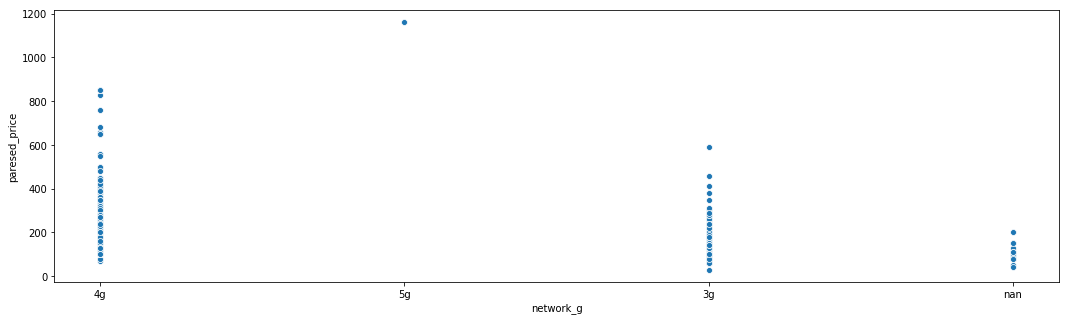

In [1293]:
import seaborn as sns
plt.figure(figsize=(18,5))
sns.scatterplot(y= "paresed_price", data= final_df,x= 'network_g');

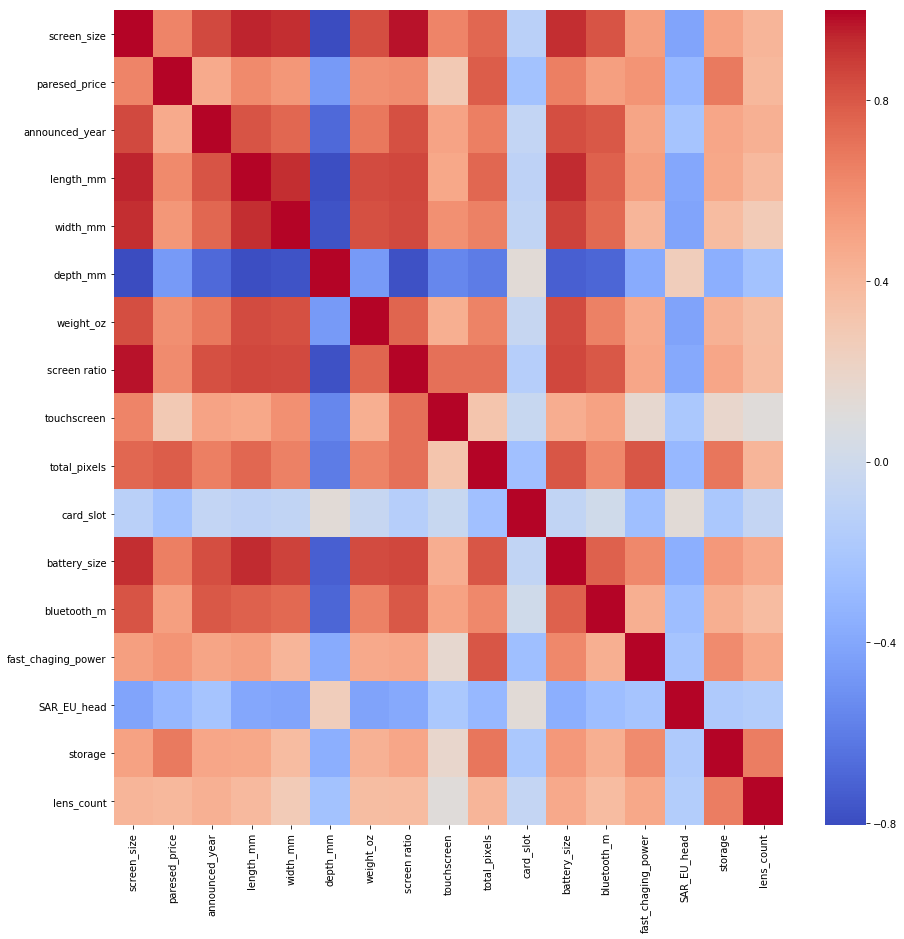

In [1291]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),cmap="coolwarm");

In [1272]:
final_df.drop(columns=["dual_sim"],inplace=True)

In [1290]:
final_df["storage"] = final_df["storage"]*np.where (final_df.storage_unit == 'GB',1024,1)

In [1294]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  


In [ ]:
final_df.set_index("phone",inplace=True)

In [1326]:
final_df["fast_chaging_power"]= final_df["fast_chaging_power"].astype("int")

In [1327]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, Galaxy Xcover 4s to Z370
Data columns (total 35 columns):
screen_size                  518 non-null float64
paresed_price                518 non-null int64
announced_year               518 non-null int64
length_mm                    518 non-null float64
width_mm                     518 non-null float64
depth_mm                     518 non-null float64
weight_oz                    518 non-null float64
screen ratio                 518 non-null float64
touchscreen                  518 non-null int64
total_pixels                 518 non-null float64
card_slot                    518 non-null int64
battery_size                 518 non-null float64
bluetooth_m                  518 non-null int64
fast_chaging_power           518 non-null int64
SAR_EU_head                  518 non-null float64
storage                      518 non-null float64
lens_count                   518 non-null int64
removable_B_Removable        518 non-null uint8


In [1314]:
#final_df.drop(columns ="storage_unit",inplace=True)
final_df.dropna(inplace=True)
final_df = pd.get_dummies(final_df,drop_first=True)

In [1333]:
final_df.drop(final_df[final_df[ 'network_g_5g']==1].index,inplace =True)

In [1334]:
pwd

'/Users/nayefalhaidari'

/Users/nayefalhaidari/Documents/Project2


'/Users/nayefalhaidari/Documents/Project2'